# Analisis de Discriminante Lineal

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Carga de datos, usaremos una base familiar

In [2]:
# Carga de base de datos
wine_info = load_wine()
X = pd.DataFrame(wine_info.data, columns=wine_info.feature_names)
y = pd.Categorical.from_codes(wine_info.target, wine_info.target_names)

In [3]:
X.shape

(178, 13)

In [4]:
wine_info.target_names 
np.array(['class_0', 'class_1', 'class_2'], dtype='<U7')

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Juntamos las dos matrices

In [5]:
df = X.join(pd.Series(y, name='class'))

In [6]:
# Calculamos las medias de cada variable para cada clase
feature_means1 = pd.DataFrame(columns=wine_info.target_names)
for c, rows in df.groupby('class'):
    feature_means1[c] = rows.mean()
feature_means1

/tmp/ipykernel_10700/3198320008.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means1[c] = rows.mean()


,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [7]:
# Calculamos la matriz de dispersión interna
withinclass_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)

    s = np.zeros((13,13))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), feature_means1[c].values.reshape(13,1)

    s += (x - mc).dot((x - mc).T)

    withinclass_scatter_matrix += s

In [8]:
#Calculamos la matriz de dispersión externa
feature_means2 = df.mean()
betweenclass_scatter_matrix = np.zeros((13,13))
for c in feature_means1:
    n = len(df.loc[df['class'] == c].index)
    mc, m = feature_means1[c].values.reshape(13,1), feature_means2.values.reshape(13,1)
    betweenclass_scatter_matrix += n * (mc - m).dot((mc - m).T)

/tmp/ipykernel_10700/1267305604.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means2 = df.mean()


### Advertencia: a continuación veremos un poco de algebra lineal computacional!

In [9]:
## algebra lineal, calculo de valores y vectores propios de la matriz intra clases producto punto matriz inter clases
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(withinclass_scatter_matrix).dot(betweenclass_scatter_matrix))

In [10]:
# Asociar valores propios con vectores propios
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
# Ordena el par de valor/vector respecto de los valores propios
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)
for pair in eigen_pairs:
    print(pair[0])

6.480320288884834e+18
4.039055975745475e+18
4721.496573060411
2402.689764559206
2402.689764559206
1061.0106641392747
1061.0106641392747
669.0833883110129
494.514280512886
349.550639698957
349.550639698957
335.51358643839546
335.51358643839546


In [11]:
# La suma de la varianza explicada por cada uno de los vectores propios
sum_of_eigen_values = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(eigen_pairs):
   print('Eigenvector {}: {}'.format(i, (pair[0]/sum_of_eigen_values).real))

Explained Variance
Eigenvector 0: 2.6544935155142744
Eigenvector 1: 1.654493515514274
Eigenvector 2: 1.9340374361139026e-15
Eigenvector 3: 9.841989462703667e-16
Eigenvector 4: 9.841989462703667e-16
Eigenvector 5: 4.3461523540433935e-16
Eigenvector 6: 4.3461523540433935e-16
Eigenvector 7: 2.7407248969719355e-16
Eigenvector 8: 2.025648258778512e-16
Eigenvector 9: 1.4318426637280024e-16
Eigenvector 10: 1.4318426637280024e-16
Eigenvector 11: 1.3743435507273682e-16
Eigenvector 12: 1.3743435507273682e-16


## LDA 2 dimensiones

In [12]:
W_matrix = np.hstack((eigen_pairs[0][1].reshape(13,1), eigen_pairs[1][1].reshape(13,1))).real
X_lda = np.array(X.dot(W_matrix))

In [13]:
W_matrix

array([[ 6.9033e-02,  1.6320e-01],
       [ 1.6221e-02, -5.2289e-02],
       [ 4.5920e-01, -3.2474e-01],
       [-4.9215e-03,  1.7564e-02],
       [ 3.6125e-03, -6.6983e-03],
       [-7.5562e-03, -1.2326e-01],
       [-1.6420e-02, -3.8031e-02],
       [-8.3102e-01, -8.6576e-01],
       [-6.5594e-02, -2.0596e-01],
       [-3.3101e-02,  2.9013e-02],
       [-1.2262e-01, -2.3513e-01],
       [ 2.6965e-01, -9.0860e-03],
       [ 1.3780e-04, -2.2012e-04]])

## LDA 3 dimensiones

In [16]:
W_matrix_3LDA = np.hstack(
    (eigen_pairs[0][1].reshape(13,1), 
     eigen_pairs[1][1].reshape(13,1),
     eigen_pairs[2][1].reshape(13,1))).real
X_lda_2 = np.array(X.dot(W_matrix_3LDA))

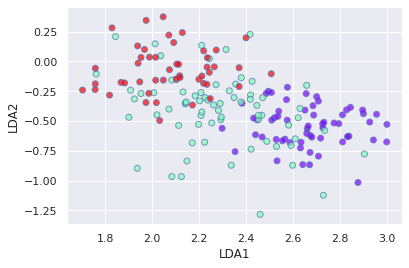

In [17]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(
X_lda[:,0],
X_lda[:,1],
c=wine_info.target,
cmap='rainbow',
alpha=0.7,
edgecolors='b'
)

<Figure size 432x288 with 0 Axes>

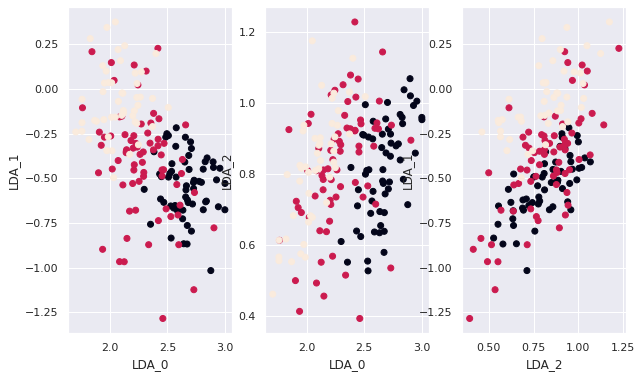

In [18]:
f = plt.figure()    
f, axes = plt.subplots(ncols = 3,figsize=(10, 6))#, sharex=False, sharey = False)

axes[0].scatter(X_lda_2[:,0],X_lda_2[:,1], c = wine_info.target)
axes[0].set_xlabel('LDA_0', labelpad = 5)
axes[0].set_ylabel('LDA_1', labelpad = 5)

axes[1].scatter(X_lda_2[:,0],X_lda_2[:,2], c = wine_info.target)
axes[1].set_xlabel('LDA_0', labelpad = 5)
axes[1].set_ylabel('LDA_2', labelpad = 5)

axes[2].scatter(X_lda_2[:,2],X_lda_2[:,1], c = wine_info.target)
axes[2].set_xlabel('LDA_2', labelpad = 5)
axes[2].set_ylabel('LDA_1', labelpad = 5)

plt.show()

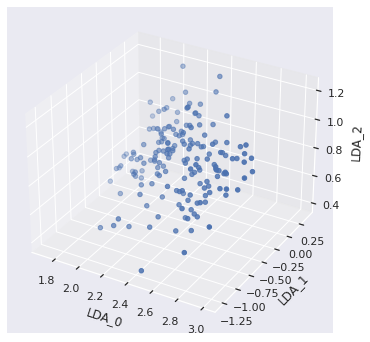

In [19]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection = '3d')

x = X_lda_2[:,0]
y =  X_lda_2[:,1]
z =  X_lda_2[:,2]

ax.scatter(x, y, z)
ax.set_xlabel("LDA_0")
ax.set_ylabel("LDA_1")
ax.set_zlabel("LDA_2")

plt.show()

### Usando scikit-learn -- Como Reductor de dimensiones

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, wine_info.target)
#X_lda = lda_model.fit_transform(X, y)

In [21]:
lda_model.explained_variance_ratio_

array([0.6875, 0.3125])

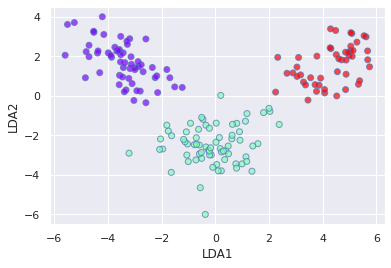

In [22]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(
X_lda[:,0],
X_lda[:,1],
   c=wine_info.target,
cmap='rainbow',
   alpha=0.7,
edgecolors='b'
)

## Como predictor

Hasta ahora, todo bien, pero hemos usado el 100% de los datos. Como queremos predecir y evaluar qué tan bien predice, debemos introducir lo visto previamente en clases

Primero, debemos separar la base en al menos entrenamiento y prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, wine_info.target, 
                                                    random_state=1,train_size=.7)

Desde scikit-learn, haremos modelos de discriminante lineal, asi que importamos

In [24]:
from sklearn import discriminant_analysis
LDAs = discriminant_analysis.LinearDiscriminantAnalysis()

In [25]:
LDAs.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [26]:
 predicted = LDAs.predict(X_train)

In [27]:
confusion_matrix(predicted,y_train)

array([[36,  0,  0],
       [ 0, 52,  0],
       [ 0,  0, 36]])

En entrenamiento, todo parece estar bien. Evaluemos cómo se comporta en prueba

In [28]:
 predicted = LDAs.predict(X_test)

In [29]:
confusion_matrix(predicted,y_test)

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 12]])

Como podemos ver, precision y recall son 100%, accuracy estaria evaluando al 100% también.

# Regresión Logística

Para el caso de regresión logistica debemos tratar un poco los datos si usaramos la misma base. Dado que este tipo de clasificador sólo evalua si es que es o no de 1 categoría, entonces debemos combinar las que no nos interesen 

In [30]:
Clase_0 = wine_info.target == 0
Clase_1 = wine_info.target == 1

In [31]:
print(Clase_0.sum())
print(Clase_1.sum())
print(len(Clase_0))

59
71
178


In [32]:
from sklearn.linear_model import LogisticRegression

Aquí hay algo curioso con el programa, y es que define como lineal al modelo logistico

separamos los datos como antes, pero tenemos que considerar la clase

In [33]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    X, Clase_0, test_size=0.1, random_state=4)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, Clase_1, test_size=0.1, random_state=4)

In [34]:
clf_0 = LogisticRegression(random_state=0,max_iter = 1000).fit(X_train_0, y_train_0)
clf_1 = LogisticRegression(random_state=0,max_iter = 1000).fit(X_train_1, y_train_1)

In [35]:
predicts_logC0 = clf_0.predict(X_test_0)
predicts_logC1 = clf_1.predict(X_test_1)

In [36]:
clf_0.predict_proba(X_test_0)

array([[9.9039e-01, 9.6124e-03],
       [9.9958e-01, 4.1838e-04],
       [1.6464e-08, 1.0000e+00],
       [2.7814e-04, 9.9972e-01],
       [7.4684e-01, 2.5316e-01],
       [9.9428e-01, 5.7181e-03],
       [6.6732e-05, 9.9993e-01],
       [6.5085e-01, 3.4915e-01],
       [2.7183e-04, 9.9973e-01],
       [9.9950e-01, 4.9563e-04],
       [9.9937e-01, 6.2632e-04],
       [1.5153e-08, 1.0000e+00],
       [9.9983e-01, 1.7130e-04],
       [9.9718e-01, 2.8153e-03],
       [4.4981e-04, 9.9955e-01],
       [9.9992e-01, 8.4095e-05],
       [2.7007e-03, 9.9730e-01],
       [9.9832e-01, 1.6843e-03]])

In [37]:
print('Matriz de confusión modelo logístico pertenece o no a la clase 0')
print(confusion_matrix(predicts_logC0,y_test_0))
print('Matriz de confusión modelo logístico pertenece o no a la clase 1')
print(confusion_matrix(predicts_logC1,y_test_1))

Matriz de confusión modelo logístico pertenece o no a la clase 0
[[11  0]
 [ 0  7]]
Matriz de confusión modelo logístico pertenece o no a la clase 1
[[12  0]
 [ 0  6]]


In [38]:
# Qué pasa si escribo cruzado los valores?
confusion_matrix(predicts_logC1,y_test_0)

array([[5, 7],
       [6, 0]])

In [39]:
from sklearn import metrics

In [40]:
metrics.roc_auc_score(y_test_0, predicts_logC0)

1.0

In [42]:
from sklearn.datasets import load_breast_cancer


In [43]:
bc = load_breast_cancer()

In [50]:
bc.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [59]:
pd.DataFrame(bc.data,columns = bc.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
pd.DataFrame(bc.data,columns = bc.feature_names).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
